# 使用手寫辨識資料集, 觀察 PCA 算法

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [3]:
# 先執行 GridSearchCV 跑出最佳參數
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.913):
{'logistic__alpha': 0.01, 'pca__n_components': 30}


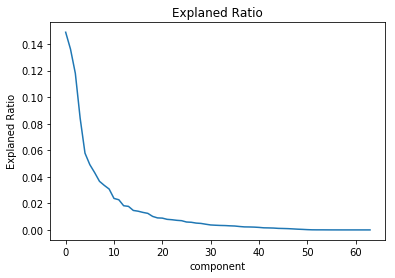

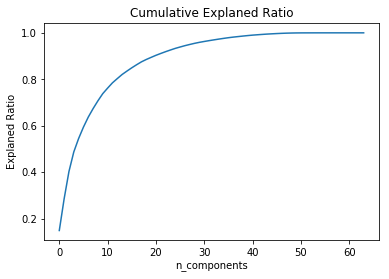

In [8]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)
plt.figure(1)
plt.plot(pca.explained_variance_ratio_)
plt.title('Explaned Ratio')
plt.xlabel('component')
plt.ylabel('Explaned Ratio')

plt.figure(2)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Cumulative Explaned Ratio')
plt.xlabel('n_components')
plt.ylabel('Explaned Ratio')

plt.show()

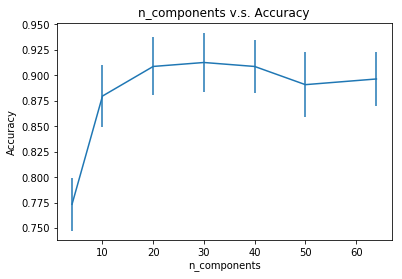

In [20]:
# 繪製不同採樣點的分類正確率
Score = search.cv_results_['mean_test_score']
ScoreErr = search.cv_results_['std_test_score']
Alpha = search.cv_results_['param_logistic__alpha'].data
n_comp = search.cv_results_['param_pca__n_components'].data
IDX = Alpha==search.best_params_['logistic__alpha']

plt.errorbar(n_comp[IDX],Score[IDX],yerr = ScoreErr[IDX])
plt.title('n_components v.s. Accuracy')
plt.xlabel('n_components')
plt.ylabel('Accuracy')
plt.show()
